In the catchment_area notebook, we have successfully extracted one shopping centre's requested income information. In this section, the goal is to continue this data wrangling process for the rest of shopping centre locations. Instead of repeating the process manually, we try to create some loops to process the data automatically.

Here are good resources discussed the importance of data wrangling: <br/>
[What Is Data Wrangling? Benefits, Tools, Examples and Skills](https://www.simplilearn.com/data-wrangling-article#:~:text=Data%20wrangling%20is%20the%20process%20of%20removing%20errors%20and%20combining,analysis%20is%20becoming%20increasingly%20necessary.)

# 1. transform location information into geometry.

First, we read the pre-prepared shopping malls location file 'shops_geo.csv' into Python.<br>
As you can see, the latitude and longditude are in separate columns. We need to convert the latitude and longtitude columns into one geometry column. The new geometry column then can be used for sorting buffers.<br>
[How to convert latitude/longtitude columns in CSV to Geometry Column using Python?](https://shakasom.medium.com/how-to-convert-latitude-longtitude-columns-in-csv-to-geometry-column-using-python-4219d2106dea)

In [13]:
# importing libraries
import pandas as pd # Reading csv file 
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame
import folium

In [14]:
shops_geo = pd.read_csv('shops_geo.csv')

In [15]:
shops_geo.head()

,ID,Name,Address,Suburb,State,ZIP Code,Country,Full address,latitude,longitude
0,ID029,Airport West,29-35 LOUIS STREET,AIRPORT WEST,VICTORIA,3042,Australia,"29-35 LOUIS STREET, AIRPORT WEST VIC 3042",-37.713985,144.885268
1,ID001,Belconnen,BENJAMIN WAY,BELCONNEN,AUSTRALIAN CAPITAL TERRITORY,2617,Australia,"BENJAMIN WAY, BELCONNEN ACT 2617",-35.238416,149.065957
2,ID003,Bondi Junction,500 OXFORD STREET,BONDI JUNCTION,NEW SOUTH WALES,2022,Australia,"500 OXFORD STREET, BONDI JUNCTION NSW 2022",-33.891289,151.250815
3,ID036,Booragoon,125 RISELEY STREET,BOORAGOON,WESTERN AUSTRALIA,6154,Australia,"125 RISELEY STREET, BOORAGOON WA 6154",-32.034080,115.835470
4,ID004,Burwood,100 BURWOOD ROAD,BURWOOD,NEW SOUTH WALES,2134,Australia,"100 BURWOOD ROAD, BURWOOD NSW 2134",-33.874545,151.105889


In [16]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(shops_geo['longitude'], shops_geo['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(shops_geo, crs=crs, geometry=geometry)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [17]:
gdf.head()

,ID,Name,Address,Suburb,State,ZIP Code,Country,Full address,latitude,longitude,geometry
0,ID029,Airport West,29-35 LOUIS STREET,AIRPORT WEST,VICTORIA,3042,Australia,"29-35 LOUIS STREET, AIRPORT WEST VIC 3042",-37.713985,144.885268,POINT (144.88527 -37.71399)
1,ID001,Belconnen,BENJAMIN WAY,BELCONNEN,AUSTRALIAN CAPITAL TERRITORY,2617,Australia,"BENJAMIN WAY, BELCONNEN ACT 2617",-35.238416,149.065957,POINT (149.06596 -35.23842)
2,ID003,Bondi Junction,500 OXFORD STREET,BONDI JUNCTION,NEW SOUTH WALES,2022,Australia,"500 OXFORD STREET, BONDI JUNCTION NSW 2022",-33.891289,151.250815,POINT (151.25081 -33.89129)
3,ID036,Booragoon,125 RISELEY STREET,BOORAGOON,WESTERN AUSTRALIA,6154,Australia,"125 RISELEY STREET, BOORAGOON WA 6154",-32.034080,115.835470,POINT (115.83547 -32.03408)
4,ID004,Burwood,100 BURWOOD ROAD,BURWOOD,NEW SOUTH WALES,2134,Australia,"100 BURWOOD ROAD, BURWOOD NSW 2134",-33.874545,151.105889,POINT (151.10589 -33.87454)


# 2. Get the buffer zone for all shopping centres

In [18]:
# we input the circle size around the shopping centres. 
# Here we choose a 5km zone as an example. 
# We use r for the buffer zone radius. The distance is measured in metres, hence 5km is represented as 5000.
r = 5000

In [19]:
buffer_5 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_5

0     POLYGON ((144.94196 -37.71499, 144.94157 -37.7...
1     POLYGON ((149.12087 -35.23747, 149.12072 -35.2...
2     POLYGON ((151.30474 -33.88941, 151.30470 -33.8...
3     POLYGON ((115.88077 -32.04646, 115.87913 -32.0...
4     POLYGON ((151.15981 -33.87273, 151.15977 -33.8...
5     POLYGON ((153.15195 -27.50055, 153.15195 -27.5...
6     POLYGON ((115.98322 -32.03149, 115.98158 -32.0...
7     POLYGON ((151.23703 -33.79536, 151.23698 -33.7...
8     POLYGON ((153.08243 -27.38222, 153.08243 -27.3...
9     POLYGON ((153.36916 -27.85268, 153.36917 -27.8...
10    POLYGON ((145.18238 -37.78631, 145.18199 -37.7...
11    POLYGON ((151.27829 -33.94295, 151.27825 -33.9...
12    POLYGON ((145.36068 -38.01790, 145.36031 -38.0...
13    POLYGON ((153.13323 -27.56050, 153.13324 -27.5...
14    POLYGON ((144.41951 -38.14783, 144.41908 -38.1...
15    POLYGON ((153.38657 -27.92363, 153.38658 -27.9...
16    POLYGON ((151.15446 -33.70221, 151.15441 -33.7...
17    POLYGON ((151.15923 -33.96444, 151.15919 -

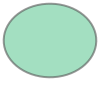

In [20]:
buffer_5[0]

In [21]:
# Visualisation of the Airport West Shopping Centre with the 5km radius zone.
m = folium.Map((gdf.latitude[0], gdf.longitude[0]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[0]).add_to(m)
m

In [22]:
# Visualise Belconnen Shopping Centre.
m = folium.Map((gdf.latitude[1], gdf.longitude[1]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[1]).add_to(m)
m

# 3.  Select sa1 Income Data inside the Buffer

We use 'sa1_income_wrangled.geojson' dataset as discovered in the 'SA1_2021_census_income_dataset_wrangling.ipynb'. <br>
First load the 'sa1_income_wrangled.geojson' dataset.

In [24]:
sa1_income_wrangled = gpd.read_file('sa1_income_wrangled_2021.geojson')

In [25]:
sa1_income_wrangled

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,geometry
0,10102100701,1,10102100701,51,1613,689,210,1875,0.7,1583,2.3,362.8727,1,83,42,119,"POLYGON ((149.89110 -35.08990, 149.89181 -35.0..."
1,10102100702,2,10102100702,54,1622,818,270,2266,0.7,1774,2.3,229.7459,2,87,31,121,"POLYGON ((149.73421 -35.36758, 149.74475 -35.3..."
2,10102100703,3,10102100703,41,1625,834,350,1892,0.8,1542,2.4,2.3910,3,120,63,187,"POLYGON ((149.77998 -35.44067, 149.77996 -35.4..."
3,10102100704,4,10102100704,57,1603,732,300,1451,0.7,1182,2.0,1.2816,4,125,91,220,"POLYGON ((149.79744 -35.44149, 149.79778 -35.4..."
4,10102100705,5,10102100705,47,1855,779,385,2095,0.7,1468,2.1,1.1978,5,111,64,172,"POLYGON ((149.79498 -35.44902, 149.79517 -35.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61839,90104100406,61840,90104100406,0,0,0,0,0,0.0,0,0.0,4.9544,61840,0,0,0,"MULTIPOLYGON (((167.95810 -29.00470, 167.95808..."
61840,90104100407,61841,90104100407,50,1200,675,255,1625,0.8,1179,2.3,10.5956,61841,110,53,168,"MULTIPOLYGON (((167.91661 -29.00961, 167.91659..."
61841,90104100408,61842,90104100408,0,0,0,0,0,0.0,0,0.0,2.3801,61842,0,0,0,"MULTIPOLYGON (((167.96325 -29.07213, 167.96326..."
61842,99797979993,61843,99797979993,0,0,0,0,0,0.0,0,0.0,NaN,61843,0,0,0,None


Dropping rows from 'sa1_med_income' dataframe wherethe columns 'median_tot_fam_inc_weekly', 'Tot_Tot' have value 0

In [26]:
sa1_income_wrangled = sa1_income_wrangled[sa1_income_wrangled['Median_tot_hhd_inc_weekly'] != 0]

In [27]:
sa1_income_wrangled = sa1_income_wrangled[sa1_income_wrangled['Tot_Tot'] != 0]

In [28]:
sa1_income_wrangled["Total_household_income_per_week_by_sa1"] = (
    sa1_income_wrangled["Median_tot_hhd_inc_weekly"] * sa1_income_wrangled["Tot_Tot"]
)

In [29]:
sa1_income_wrangled

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,geometry,Total_household_income_per_week_by_sa1
0,10102100701,1,10102100701,51,1613,689,210,1875,0.7,1583,2.3,362.8727,1,83,42,119,"POLYGON ((149.89110 -35.08990, 149.89181 -35.0...",188377
1,10102100702,2,10102100702,54,1622,818,270,2266,0.7,1774,2.3,229.7459,2,87,31,121,"POLYGON ((149.73421 -35.36758, 149.74475 -35.3...",214654
2,10102100703,3,10102100703,41,1625,834,350,1892,0.8,1542,2.4,2.3910,3,120,63,187,"POLYGON ((149.77998 -35.44067, 149.77996 -35.4...",288354
3,10102100704,4,10102100704,57,1603,732,300,1451,0.7,1182,2.0,1.2816,4,125,91,220,"POLYGON ((149.79744 -35.44149, 149.79778 -35.4...",260040
4,10102100705,5,10102100705,47,1855,779,385,2095,0.7,1468,2.1,1.1978,5,111,64,172,"POLYGON ((149.79498 -35.44902, 149.79517 -35.4...",252496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61835,90104100402,61836,90104100402,48,1170,753,243,1800,0.8,1351,2.2,2.9923,61836,90,51,145,"POLYGON ((167.97820 -29.03005, 167.97820 -29.0...",195895
61836,90104100403,61837,90104100403,52,1300,762,250,1625,0.7,1076,1.9,6.0243,61837,125,103,229,"MULTIPOLYGON (((167.95891 -29.06083, 167.95884...",246404
61837,90104100404,61838,90104100404,50,1200,692,230,1413,0.7,1143,2.0,4.8623,61838,100,76,183,"MULTIPOLYGON (((167.95877 -29.00959, 167.95868...",209169
61838,90104100405,61839,90104100405,76,0,449,150,725,0.4,724,1.4,1.2368,61839,5,0,4,"POLYGON ((167.92899 -29.03503, 167.92924 -29.0...",2896


In [30]:
sa1_income_wrangled = sa1_income_wrangled.dropna()

In [31]:
sa1_income_wrangled

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,geometry,Total_household_income_per_week_by_sa1
0,10102100701,1,10102100701,51,1613,689,210,1875,0.7,1583,2.3,362.8727,1,83,42,119,"POLYGON ((149.89110 -35.08990, 149.89181 -35.0...",188377
1,10102100702,2,10102100702,54,1622,818,270,2266,0.7,1774,2.3,229.7459,2,87,31,121,"POLYGON ((149.73421 -35.36758, 149.74475 -35.3...",214654
2,10102100703,3,10102100703,41,1625,834,350,1892,0.8,1542,2.4,2.3910,3,120,63,187,"POLYGON ((149.77998 -35.44067, 149.77996 -35.4...",288354
3,10102100704,4,10102100704,57,1603,732,300,1451,0.7,1182,2.0,1.2816,4,125,91,220,"POLYGON ((149.79744 -35.44149, 149.79778 -35.4...",260040
4,10102100705,5,10102100705,47,1855,779,385,2095,0.7,1468,2.1,1.1978,5,111,64,172,"POLYGON ((149.79498 -35.44902, 149.79517 -35.4...",252496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61835,90104100402,61836,90104100402,48,1170,753,243,1800,0.8,1351,2.2,2.9923,61836,90,51,145,"POLYGON ((167.97820 -29.03005, 167.97820 -29.0...",195895
61836,90104100403,61837,90104100403,52,1300,762,250,1625,0.7,1076,1.9,6.0243,61837,125,103,229,"MULTIPOLYGON (((167.95891 -29.06083, 167.95884...",246404
61837,90104100404,61838,90104100404,50,1200,692,230,1413,0.7,1143,2.0,4.8623,61838,100,76,183,"MULTIPOLYGON (((167.95877 -29.00959, 167.95868...",209169
61838,90104100405,61839,90104100405,76,0,449,150,725,0.4,724,1.4,1.2368,61839,5,0,4,"POLYGON ((167.92899 -29.03503, 167.92924 -29.0...",2896


Before any geospatial manipulation, we need to make sure 'buffer_5' and 'sa1_med_income' use same coordinate system. 

In [32]:
buffer_5.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
sa1_income_wrangled.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As you can see, 'buffer_5' use WGS 84 and 'sa1_med_income' use GDA94. We need to transform the coordinates to the same system for further manipulation. For more details, please find it here: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html

In [34]:
pp = buffer_5.geometry.to_crs('EPSG:4283')

In [35]:
pp.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
test = sa1_income_wrangled.intersects(pp.iloc[0])

Compare these two codes: `test = sa1_med_income.intersects(pp)` and `test = sa1_med_income.intersects(pp.iloc[0])`. The difference is that `.iloc[0]` provides the index to intersect with which buffer. `.iloc[0]` points out the position is to intersect with the first item in pp series, therefore it successfully identified 354 sa1s inside of the Airport West Shopping centre's 5km zone. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [37]:
b = test[test]

In [38]:
shops_00 = sa1_income_wrangled.loc[b.index]
shops_00

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,geometry,Total_household_income_per_week_by_sa1
22641,20601110918,22642,20601110918,37,2067,892,462,2658,0.9,2381,2.9,0.1552,22642,143,36,178,"POLYGON ((144.93322 -37.73418, 144.93421 -37.7...",423818
22642,20601110919,22643,20601110919,38,1625,836,363,2125,0.9,1612,2.0,0.0917,22643,112,116,230,"POLYGON ((144.93480 -37.73671, 144.93500 -37.7...",370760
22646,20601110923,22647,20601110923,39,2167,996,421,2824,0.9,2595,2.8,0.2830,22647,134,32,168,"POLYGON ((144.92996 -37.73863, 144.92997 -37.7...",435960
22982,20603150102,22983,20603150102,43,2550,909,426,2484,0.8,1888,2.4,0.1347,22983,142,72,211,"POLYGON ((144.89762 -37.73697, 144.89863 -37.7...",398368
22983,20603150103,22984,20603150103,41,2167,909,450,2315,0.8,1845,2.4,0.1684,22984,168,67,237,"POLYGON ((144.89280 -37.73557, 144.89295 -37.7...",437265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27850,21005125015,27851,21005125015,37,2050,568,381,1624,0.7,1111,2.4,0.0871,27851,57,25,84,"POLYGON ((144.87420 -37.70756, 144.87366 -37.7...",93324
27851,21005125016,27852,21005125016,34,1751,796,391,1771,0.8,1579,2.6,0.1250,27852,92,35,123,"POLYGON ((144.87646 -37.70192, 144.87647 -37.7...",194217
27853,21005125018,27854,21005125018,41,1475,725,331,1525,0.8,1193,2.0,0.0976,27854,85,64,147,"POLYGON ((144.87428 -37.69282, 144.87510 -37.6...",175371
31440,21301133216,31441,21301133216,38,1900,792,388,2102,0.7,1740,2.5,0.4918,31441,152,54,201,"POLYGON ((144.82617 -37.73094, 144.82526 -37.7...",349740


In [39]:
m = folium.Map((gdf.latitude[0], gdf.longitude[0]), max_zoom=20, zoom_start=12)
folium.GeoJson(buffer_5[0]).add_to(m)
folium.GeoJson(shops_00).add_to(m)
m

Here we successfully captured sa1s from 'sa1_med_income' that are within the Airport West Shopping centre's 5km buffer zone.

This dataset includes rich demographic information, such as median_age, monthly median_mortgage_repay, median personal income, weekly rent payment, weekly median total family income, average number of person per bedroom, average_household_size. Here we choose 'Median_tot_hhd_inc_weekly'--weekly median total household income as the income variable. 

In [41]:
TOTAL_HOUSEHOLD_INCOME_PER_WEEK_BY_ISOCHRONE = shops_00['Total_household_income_per_week_by_sa1'].sum()
print(TOTAL_HOUSEHOLD_INCOME_PER_WEEK_BY_ISOCHRONE)

109792927


# try the dataframe loop 
Before running the whole iteration for collecting all shopping centres' buffer zone in step 4, we continue trying a few samples and visualising these samples in a map to check the accuracy. 

In [42]:
test = sa1_income_wrangled.intersects(pp.iloc[1])

In [43]:
b = test[test]

In [44]:
shops_01 = sa1_income_wrangled.loc[b.index]
shops_01

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,geometry,Total_household_income_per_week_by_sa1
60593,80101100101,60594,80101100101,45,2900,1408,653,3892,0.7,3250,2.6,0.3691,60594,72,28,98,"POLYGON ((149.07831 -35.25612, 149.07822 -35.2...",318500
60594,80101100102,60595,80101100102,39,2259,1505,500,3937,0.8,3687,2.9,0.2487,60595,99,27,128,"POLYGON ((149.08500 -35.25603, 149.08443 -35.2...",471936
60595,80101100103,60596,80101100103,35,2442,1164,485,2963,0.9,2937,3.1,0.1498,60596,107,26,133,"POLYGON ((149.07410 -35.25530, 149.07420 -35.2...",390621
60596,80101100104,60597,80101100104,43,2695,1418,550,3643,0.7,3326,2.8,0.2989,60597,136,28,162,"POLYGON ((149.08101 -35.26019, 149.08108 -35.2...",538812
60597,80101100105,60598,80101100105,44,2167,1314,500,3232,0.8,2902,2.8,0.2633,60598,155,41,199,"POLYGON ((149.07548 -35.26023, 149.07559 -35.2...",577498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61228,80105105806,61229,80105105806,39,2167,1019,369,2625,0.9,2054,2.3,0.1304,61229,74,56,136,"POLYGON ((149.12020 -35.24987, 149.12101 -35.2...",279344
61229,80105105807,61230,80105105807,40,2903,1319,612,3924,0.8,3234,2.8,0.2938,61230,152,55,206,"POLYGON ((149.11458 -35.25030, 149.11549 -35.2...",666204
61230,80105105808,61231,80105105808,39,2730,1406,500,3971,0.8,3214,2.7,0.2959,61231,136,64,196,"POLYGON ((149.10982 -35.25825, 149.10970 -35.2...",629944
61231,80105105809,61232,80105105809,43,2525,1329,550,4125,0.8,3250,2.8,0.1469,61232,92,32,126,"POLYGON ((149.11593 -35.25399, 149.11630 -35.2...",409500


<AxesSubplot:>

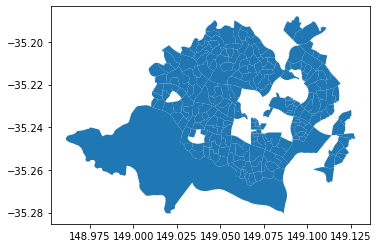

In [45]:
shops_01.plot()

In [49]:
w_01 = shops_01.describe()
w_01

,SA1_CODE_2021,id_left,SA1_NAME_2021,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size,AREA_ALBERS_SQKM,id_right,Tot_Family_households,Tot_Non_family_households,Tot_Tot,Total_household_income_per_week_by_sa1
count,2.260000e+02,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,8.010134e+10,60761.110619,8.010134e+10,38.323009,2032.929204,1129.814159,443.623894,2757.991150,0.812832,2390.685841,2.557522,0.335537,60761.110619,106.995575,48.415929,155.632743,3.615488e+05
std,9.238252e+05,133.143836,9.238252e+05,7.063339,432.664442,188.052784,92.974956,612.554694,0.133213,632.952267,0.395712,1.651402,133.143836,40.122867,38.896952,67.706639,1.441005e+05
min,8.010110e+10,60594.000000,8.010110e+10,19.000000,0.000000,406.000000,127.000000,0.000000,0.600000,474.000000,1.300000,0.009800,60594.000000,0.000000,0.000000,5.000000,4.266000e+03
25%,8.010110e+10,60680.250000,8.010110e+10,35.000000,1833.000000,1018.250000,398.500000,2390.750000,0.700000,1987.000000,2.325000,0.143975,60680.250000,81.250000,24.000000,118.000000,2.607975e+05
50%,8.010110e+10,60744.500000,8.010110e+10,38.000000,2076.000000,1128.500000,450.000000,2721.500000,0.800000,2370.000000,2.600000,0.195650,60744.500000,104.000000,39.000000,148.000000,3.397860e+05
75%,8.010110e+10,60821.750000,8.010110e+10,41.000000,2196.000000,1224.000000,500.000000,3039.750000,0.800000,2694.000000,2.800000,0.263075,60821.750000,132.000000,55.000000,185.750000,4.357628e+05
max,8.010511e+10,61235.000000,8.010511e+10,81.000000,3507.000000,1708.000000,653.000000,4750.000000,1.400000,4750.000000,4.300000,24.913900,61235.000000,391.000000,318.000000,711.000000,1.133334e+06


In [47]:
TOTAL_HOUSEHOLD_INCOME_PER_WEEK_BY_ISOCHRONE = shops_01['Total_household_income_per_week_by_sa1'].sum()
print(TOTAL_HOUSEHOLD_INCOME_PER_WEEK_BY_ISOCHRONE)


81710032


## pp.iloc[2]

count     799.000000
mean     2666.725907
std       944.337824
min        75.000000
25%      2107.000000
50%      2518.000000
75%      3156.000000
max      5656.000000
Name: Median_tot_hhd_inc_weekly, dtype: float64

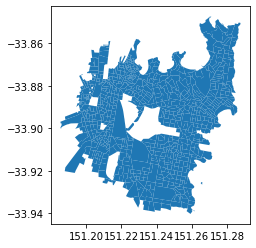

In [54]:
test = sa1_income_wrangled.intersects(pp.iloc[2])
b = test[test]
shops_02 = sa1_income_wrangled.loc[b.index]
shops_02.plot()
w_02 = shops_02.describe()
w = w_02['Median_tot_hhd_inc_weekly']
w

# 4. whole pp.iloc[] iteration -- 5km buffer

In [55]:
# we input the circle size around the shopping centres. 
# Here we choose a 5km zone as an example.5000 
# We use r for the buffer zone radius. The distance is measured in metres, hence 5km is represented as 5000.
r = 5000

In [56]:
buffer_5 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_5

0     POLYGON ((144.94196 -37.71499, 144.94157 -37.7...
1     POLYGON ((149.12087 -35.23747, 149.12072 -35.2...
2     POLYGON ((151.30474 -33.88941, 151.30470 -33.8...
3     POLYGON ((115.88077 -32.04646, 115.87913 -32.0...
4     POLYGON ((151.15981 -33.87273, 151.15977 -33.8...
5     POLYGON ((153.15195 -27.50055, 153.15195 -27.5...
6     POLYGON ((115.98322 -32.03149, 115.98158 -32.0...
7     POLYGON ((151.23703 -33.79536, 151.23698 -33.7...
8     POLYGON ((153.08243 -27.38222, 153.08243 -27.3...
9     POLYGON ((153.36916 -27.85268, 153.36917 -27.8...
10    POLYGON ((145.18238 -37.78631, 145.18199 -37.7...
11    POLYGON ((151.27829 -33.94295, 151.27825 -33.9...
12    POLYGON ((145.36068 -38.01790, 145.36031 -38.0...
13    POLYGON ((153.13323 -27.56050, 153.13324 -27.5...
14    POLYGON ((144.41951 -38.14783, 144.41908 -38.1...
15    POLYGON ((153.38657 -27.92363, 153.38658 -27.9...
16    POLYGON ((151.15446 -33.70221, 151.15441 -33.7...
17    POLYGON ((151.15923 -33.96444, 151.15919 -

In [57]:
pp = buffer_5.geometry.to_crs('EPSG:4283')

In [58]:
# whole pp.iloc[] iteration for 5km buffer intersection
#output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    w = shops['Total_household_income_per_week_by_sa1'].sum()
    print(w) 

109792927
81710032
381880952
91296087
258783613
139781265
63199325
256542282
165041287
59644049
147723249
205409851
76737250
106927398
62005832
53772239
113812014
206723533
135221158
101992692
102788399
103632618
84722827
135421099
89304426
69655621
183532020
85359694
79423923
148120436
486543476
84767217
16421121
178148914
67574373
70308629
96775196
0
0
0
0
0


In [59]:
# whole pp.iloc[] iteration for 5km buffer intersection
# Output variable: 'Median_tot_hhd_inc_weekly'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    #shops.plot()
    w = shops.describe()
    output=output.append(w['Median_tot_hhd_inc_weekly'].to_frame().T,ignore_index=True)
print(output)

    count         mean         std     min      25%     50%      75%     max
0   353.0  1883.025496  537.980707   608.0  1518.00  1833.0  2208.00  3892.0
1   226.0  2390.685841  632.952267   474.0  1987.00  2370.0  2694.00  4750.0
2   799.0  2666.725907  944.337824    75.0  2107.00  2518.0  3156.00  5656.0
3   246.0  2242.841463  622.115544   682.0  1857.75  2214.5  2547.25  4845.0
4   738.0  2185.388889  616.026821   565.0  1770.75  2119.0  2478.00  4922.0
5   363.0  2412.534435  673.986324   596.0  1965.00  2355.0  2848.00  4714.0
6   232.0  1622.176724  381.633546   225.0  1401.50  1624.5  1859.00  2777.0
7   528.0  3092.945076  962.699885   473.0  2333.00  2958.5  3750.00  5281.0
8   466.0  2153.721030  695.516149   350.0  1722.00  2088.0  2508.50  4716.0
9   199.0  2033.201005  483.138602   895.0  1734.50  1987.0  2284.50  3333.0
10  465.0  2023.709677  542.251691   758.0  1678.00  2018.0  2295.00  5500.0
11  510.0  2371.788235  746.215712   349.0  2020.25  2365.0  2750.00  4888.0

In [60]:
# whole pp.iloc[] iteration for 5km buffer intersection
# Output variable: 'Tot_Tot'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    w = shops['Tot_Tot'].sum()
    print(w)

58327
35173
148701
42148
120429
59651
38311
87603
79400
29712
75819
88838
41701
53834
37527
28296
42743
106310
61275
54523
54252
68444
53239
57698
52914
38296
100957
44535
44190
66367
189260
53432
9783
61123
43854
31973
36565
0
0
0
0
0


# 5. use same method for 1km buffer

In [61]:
# we input the circle size around the shopping centres. 
# Here we choose a 1km zone as an example.1000 
# We use r for the buffer zone radius. The distance is measured in metres, hence 1km is represented as 1000.
r = 1000

In [62]:
buffer_1 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_1

0     POLYGON ((144.89661 -37.71419, 144.89653 -37.7...
1     POLYGON ((149.07694 -35.23823, 149.07691 -35.2...
2     POLYGON ((151.26160 -33.89092, 151.26159 -33.8...
3     POLYGON ((115.84453 -32.03656, 115.84420 -32.0...
4     POLYGON ((151.11667 -33.87418, 151.11666 -33.8...
5     POLYGON ((153.11168 -27.50233, 153.11168 -27.5...
6     POLYGON ((115.94695 -32.02162, 115.94662 -32.0...
7     POLYGON ((151.19393 -33.79684, 151.19392 -33.7...
8     POLYGON ((153.04220 -27.38397, 153.04220 -27.3...
9     POLYGON ((153.32878 -27.85455, 153.32878 -27.8...
10    POLYGON ((145.13697 -37.78560, 145.13689 -37.7...
11    POLYGON ((151.23512 -33.94444, 151.23511 -33.9...
12    POLYGON ((145.31513 -38.01726, 145.31505 -38.0...
13    POLYGON ((153.09295 -27.56228, 153.09295 -27.5...
14    POLYGON ((144.37391 -38.14682, 144.37382 -38.1...
15    POLYGON ((153.34616 -27.92551, 153.34617 -27.9...
16    POLYGON ((151.11140 -33.70365, 151.11139 -33.7...
17    POLYGON ((151.11605 -33.96590, 151.11604 -

In [63]:
pp = buffer_1.geometry.to_crs('EPSG:4283')

In [64]:
# whole pp.iloc[] iteration for 1km buffer intersection

for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    w = shops['Total_household_income_per_week_by_sa1'].sum()
    print(w)
 

4182948
9731927
34804161
7956872
19349349
7920659
4710694
23459895
9108008
1185217
10576048
12967718
4787766
7265913
4441110
3282096
19175078
22387460
6015969
6313870
9339715
10845417
9463485
14958852
7684964
6170138
23598803
6355848
4415016
11817370
31895866
5539594
2420534
13057161
5170187
6445740
10133316
0
0
0
0
0


In [67]:
# whole pp.iloc[] iteration for 1km buffer intersection
# Output variable: 'Median_tot_hhd_inc_weekly'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    w = shops.describe()
    output=output.append(w['Median_tot_hhd_inc_weekly'].to_frame().T,ignore_index=True)
print(output)

    count         mean         std     min      25%     50%      75%     max
0    14.0  1578.714286  432.818212   791.0  1373.75  1621.5  1874.50  2291.0
1    25.0  1882.800000  399.250026   872.0  1594.00  1918.0  2108.00  2573.0
2    67.0  2997.000000  909.163152  1708.0  2365.00  2636.0  3587.50  5656.0
3    20.0  2244.600000  522.804623   831.0  1988.50  2195.5  2579.75  3118.0
4    62.0  1895.032258  392.225678  1068.0  1688.00  1904.5  2140.75  2694.0
5    23.0  2099.086957  493.489238  1198.0  1865.00  2031.0  2422.50  3068.0
6    17.0  1618.647059  172.356803  1241.0  1531.00  1625.0  1674.00  1908.0
7    58.0  2409.258621  727.111747  1187.0  1998.75  2171.5  2834.00  4640.0
8    29.0  1575.655172  399.953236   735.0  1305.00  1538.0  1775.00  2700.0
9     5.0  1767.600000  359.434695  1319.0  1586.00  1702.0  1981.00  2250.0
10   33.0  1730.666667  440.520053  1241.0  1455.00  1601.0  1906.00  3303.0
11   35.0  2092.657143  583.915583   949.0  1594.00  2214.0  2385.00  3333.0

In [68]:
# whole pp.iloc[] iteration for 1km buffer intersection
# Output variable: 'Tot_Tot'
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    w = shops['Tot_Tot'].sum()
    print(w)

2627
5291
12011
3625
10490
3987
2904
10090
5905
710
6269
6237
2905
4434
2498
1985
9947
12410
3173
3712
4314
8836
6748
7515
5007
3625
11407
4408
2475
6168
13194
4142
1424
4580
2994
3281
4739
0
0
0
0
0


# 6. use same method for 10km buffer

In [97]:
# we input the circle size around the shopping centres. 
# Here we choose a 1km zone as an example.10000 
# We use r for the buffer zone radius. The distance is measured in metres, hence 10km is represented as 10000.
r = 10000

In [98]:
buffer_10 = gdf.to_crs(epsg=7855).buffer(r).to_crs(epsg=4326)
buffer_10

0     POLYGON ((144.99866 -37.71597, 144.99787 -37.7...
1     POLYGON ((149.17579 -35.23649, 149.17549 -35.2...
2     POLYGON ((151.35866 -33.88751, 151.35859 -33.8...
3     POLYGON ((115.92610 -32.05883, 115.92281 -32.0...
4     POLYGON ((151.21373 -33.87090, 151.21364 -33.8...
5     POLYGON ((153.20227 -27.49830, 153.20228 -27.5...
6     POLYGON ((116.02859 -32.04382, 116.02532 -32.0...
7     POLYGON ((151.29089 -33.79350, 151.29081 -33.8...
8     POLYGON ((153.13271 -27.38001, 153.13271 -27.3...
9     POLYGON ((153.41962 -27.85034, 153.41966 -27.8...
10    POLYGON ((145.23913 -37.78717, 145.23838 -37.7...
11    POLYGON ((151.33224 -33.94106, 151.33217 -33.9...
12    POLYGON ((145.41762 -38.01868, 145.41688 -38.0...
13    POLYGON ((153.18359 -27.55826, 153.18360 -27.5...
14    POLYGON ((144.47652 -38.14907, 144.47566 -38.1...
15    POLYGON ((153.43706 -27.92127, 153.43710 -27.9...
16    POLYGON ((151.20827 -33.70039, 151.20818 -33.7...
17    POLYGON ((151.21321 -33.96260, 151.21312 -

In [99]:
pp = buffer_10.geometry.to_crs('EPSG:4283')

In [100]:
# whole pp.iloc[] iteration for 10km buffer intersection

for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    #shops.plot()
    w = shops['Total_household_income_per_week_by_sa1'].sum()
    print(w)

415560422
246730829
880516192
321075330
1002880470
459006912
263869279
925518980
456419617
126820836
539085555
768704660
206777167
337202409
120649654
182439512
365934165
671809138
345604989
361476459
192808157
326201316
242580667
356575785
262351778
181527496
624769679
152703342
262884775
410985961
1165827347
234611281
67429863
485805403
162081223
186471566
201968532
0
0
0
0
0


In [102]:
# whole pp.iloc[] iteration for 10km buffer intersection
# Output variable: 'Median_tot_hhd_inc_weekly'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['median_tot_fam_inc_weekly'].to_frame().T)
    output=output.append(w['Median_tot_hhd_inc_weekly'].to_frame().T,ignore_index=True)
print(output)

     count         mean         std    min      25%     50%      75%     max
0   1407.0  1809.592040  533.183428  383.0  1410.00  1803.0  2180.50  4050.0
1    648.0  2573.271605  725.104073   75.0  2114.75  2440.5  3015.00  6444.0
2   1865.0  2676.929759  913.781175   75.0  2143.00  2523.0  3146.00  5944.0
3    873.0  2184.146621  768.152809  225.0  1701.00  2083.0  2455.00  5714.0
4   2850.0  2120.188070  738.228901   75.0  1625.00  2056.5  2453.00  5281.0
5   1234.0  2205.762561  703.492649  225.0  1764.00  2120.5  2528.75  5428.0
6    849.0  1882.425206  531.296409  225.0  1513.00  1854.0  2215.00  3856.0
7   1992.0  2833.342369  923.769852   75.0  2208.00  2716.5  3374.00  5944.0
8   1205.0  2270.331120  746.081135  225.0  1805.00  2179.0  2643.00  5428.0
9    425.0  2013.002353  541.011197  602.0  1702.00  2020.0  2309.00  3687.0
10  1582.0  2206.015171  629.486174  333.0  1812.00  2119.0  2482.00  5500.0
11  1811.0  2423.952512  793.486859   75.0  1962.50  2333.0  2841.50  5656.0

In [103]:
# whole pp.iloc[] iteration for 10km buffer intersection
# Output variable: 'Tot_Tot'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['median_tot_fam_inc_weekly'].to_frame().T)
    output=output.append(w['Tot_Tot'].to_frame().T,ignore_index=True)
print(output)

     count        mean        std   min     25%    50%     75%     max
0   1407.0  161.994314  64.044748   3.0  122.00  155.0  193.00   913.0
1    648.0  152.384259  72.112690   3.0  109.00  139.0  181.00   711.0
2   1865.0  181.469169  75.941185   3.0  132.00  171.0  221.00   707.0
3    873.0  173.920962  67.067759   3.0  128.00  169.0  209.00   745.0
4   2850.0  165.916842  77.464446   3.0  120.00  156.0  196.00  1477.0
5   1234.0  172.764182  71.528602   3.0  126.25  163.0  208.00   702.0
6    849.0  166.750294  64.822008   3.0  123.00  159.0  199.00   713.0
7   1992.0  171.128514  75.925937   3.0  123.00  160.0  206.00  1477.0
8   1205.0  172.207469  71.584303   3.0  124.00  160.0  208.00   702.0
9    425.0  151.178824  56.402245   3.0  114.00  145.0  182.00   395.0
10  1582.0  159.655499  55.337166   3.0  121.00  154.0  192.00   427.0
11  1811.0  177.578686  76.155444   3.0  127.00  166.0  215.00   707.0
12   777.0  141.656371  48.603292   3.0  109.00  137.0  170.00   431.0
13  10

In [104]:
# whole pp.iloc[] iteration for 10km buffer intersection
# Output variable: 'Total_household_income_per_week_by_sa1'
output = pd.DataFrame([])
for index, value in pp.iteritems():
    test = sa1_income_wrangled.intersects(value)
    b = test[test]
    shops = sa1_income_wrangled.loc[b.index]
    #shops.plot()
    w = shops.describe()
#    print(w['Total_household_income_per_week_by_sa1'].to_frame().T)
    output=output.append(w['Total_household_income_per_week_by_sa1'].to_frame().T,ignore_index=True)
print(output)

     count           mean            std      min        25%       50%  \
0   1407.0  295352.112296  151692.347440   2175.0  189903.00  271765.0   
1    648.0  380757.452160  169497.780041    225.0  270716.25  355552.5   
2   1865.0  472126.644504  218424.784562    225.0  320255.00  450447.0   
3    873.0  367783.883162  158536.576186   1350.0  260883.00  349398.0   
4   2850.0  351887.884211  199940.132520    225.0  220000.00  312304.0   
5   1234.0  371966.703404  165981.998564    675.0  256308.25  350365.0   
6    849.0  310800.093051  144495.445777   1350.0  215392.00  294528.0   
7   1992.0  464617.961847  197443.332055    225.0  333840.00  445394.5   
8   1205.0  378771.466390  166053.405116    675.0  267729.00  359682.0   
9    425.0  298401.967059  126517.090025   3561.0  219891.00  279150.0   
10  1582.0  340762.044880  119475.011080   3663.0  257545.50  330015.0   
11  1811.0  424464.196576  213294.950698    225.0  280636.50  391272.0   
12   777.0  266122.480051  111957.1093

# 6. use same method for 10km, 20km, 30km, 40km, 50km buffer

The method for 10km, 20km, towards 50km buffer is the same as 1km and 5km. Please refer to the above codes to generate these results. All the results can be found in the file 'Shopping_malls_2016_2021_update_16.06.2023.xlsx', at https://github.com/AURIN-OFFICE/shopping_centre_buffer. 

You can also process 2016 Census data by following the same method. 